# Graveyard Of Wikidata - Statistics

Github : https://github.com/haikelJebahi/Graveyard-of-wikidata

Data : https://iccl.inf.tu-dresden.de/web/Wikidata_SPARQL_Logs/en

## Imports

In [ ]:
%matplotlib inline
from joblib import dump, load
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from urllib.parse import unquote_plus
from pyparsing import ParseException
from rdflib.plugins.sparql.algebra import translateQuery, translateUpdate, pprintAlgebra, traverse
from rdflib.plugins.sparql.parser import parseQuery, parseUpdate
from rdflib.plugins.sparql.operators import Builtin_LANG
from rdflib.plugins.sparql.parserutils import CompValue
from rdflib.term import Variable
from pandas import concat
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import colorcet as cc
from sklearn.cluster import AgglomerativeClustering
from PIL import Image
import io
import gc
import matplotlib.pyplot as plt
import networkx as nx
import json
from io import BytesIO
import base64

In [ ]:
plt.style.use("ggplot")

In [ ]:
pd.set_option("display.expand_frame_repr", True)
pd.set_option("display.max_rows", 100, "display.max_columns", None)

In [ ]:
# see parse.py
def encoded2raw(encoded):
    str = unquote_plus(encoded)
    str = re.sub(r"> *\*", ">*", str)
    str = re.sub(r"> *\+", ">+", str)
    str = re.sub(r"> *\?([^v])", r">?\1", str)
    return str

## Statistics

In [ ]:
nom = "../data/merged/status500_Joined.parsed.noduplicate.tsv"
df_nona = pd.read_csv(nom, sep="\t")


Adding basic attributes of queries

In [ ]:
df_nona["has_variable"] = df_nona["var_cpt"].apply(lambda x: False if x == 0 else True)
df_nona["has_filter"] = df_nona["filter"].apply(lambda x: False if x == 0 else True)
df_nona["has_orderby"] = df_nona["orderby"].apply(lambda x: False if x == 0 else True)
df_nona["has_limit"] = df_nona["limit"].apply(lambda x: False if x == 0 else True)
df_nona["has_select"] = df_nona["select"].apply(lambda x: False if x == 0 else True)
df_nona["has_distinct"] = df_nona["distinct"].apply(lambda x: False if x == 0 else True)
df_nona["has_modify"] = df_nona["modify"].apply(lambda x: False if x == 0 else True)
df_nona["has_tomultiset"] = df_nona["tomultiset"].apply(
    lambda x: False if x == 0 else True
)
df_nona["has_join"] = df_nona["join"].apply(lambda x: False if x == 0 else True)
df_nona["has_bgp"] = df_nona["bgp"].apply(lambda x: False if x == 0 else True)
df_nona["has_project"] = df_nona["project"].apply(lambda x: False if x == 0 else True)
df_nona["has_union"] = df_nona["union"].apply(lambda x: False if x == 0 else True)
df_nona["has_values"] = df_nona["values"].apply(lambda x: False if x == 0 else True)
df_nona["has_slice"] = df_nona["slice"].apply(lambda x: False if x == 0 else True)
df_nona["has_offset"] = df_nona["offset"].apply(lambda x: False if x == 0 else True)

df_nona["complexPathWith"] = df_nona.loc[:,['pathWithStar','pathWithQuestionMark','pathWithPlus']].sum(axis=1)
df_nona["simplePathWith"] = df_nona.loc[:,['pathWithInv','pathWithSequence','pathWithAlternative']].sum(axis=1)

df_nona

Split in robotic and organic

In [ ]:
df_nona_robotic = df_nona.loc[(df_nona["sourceCategory"] == "robotic")]
df_nona_robotic


,anonymizedQuery,timestamp,sourceCategory,user_agent,var_cpt,filter,orderby,select,distinct,join,project,tomultiset,union,modify,bgp,values,groupBy,slice,triples,extend,filter_not_exists,leftJoin,minus,notexist,sample,count,having,pathWithStar,pathWithPlus,pathWithQuestionMark,pathWithInv,pathWithSequence,pathWithAlternative,triplesSet,limit,limitValue,offset,offsetValue,complexPathWith,simplePathWith,algebraTree,algebraTreeMD5,graph,cycleNumber,graphDump,isForest,numberOfNodes,numberOfEdges,treewidth,isTree,averageDegree,maxCliqueWeigth,file_path,interval,has_variable,has_filter,has_orderby,has_limit,has_select,has_distinct,has_modify,has_tomultiset,has_join,has_bgp,has_project,has_union,has_values,has_slice,has_offset
0,SELECT+%3Fvar1++%3Fvar1Label++%3Fvar2+%28++CON...,2017-06-12 00:16:34,robotic,bot2,9,1,1,1,0,6,1,0,0,0,1,0,0,1,6,1,0,0,0,0,0,0,2,0,0,0,0,0,0,"[[""http://www.bigdata.com/queryHints#Query"", ""...",1,5000,0,0,0,0,SelectQuery_SelectQuery_{'p': Slice_{'p': Proj...,159f12f8ddbdd06954496911da0816cc,DiGraph with 11 nodes and 7 edges,0,gASVyAIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,11,7,1,0,1.272727,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,True,True,True,False,False,False,True,True,True,False,False,True,False
6,SELECT+DISTINCT+%3Fvar1++%3Fvar2+%0AWHERE+%7B%...,2017-06-12 01:02:37,robotic,bot2,7,1,1,1,1,9,1,0,0,0,2,0,0,0,9,1,0,0,0,0,0,0,5,0,0,0,0,2,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",0,0,0,0,0,2,SelectQuery_SelectQuery_{'p': Distinct_{'p': P...,b783c3c55117996138540535038caf13,DiGraph with 9 nodes and 9 edges,0,gASVagIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,0,9,9,2,0,2.000000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,True,False,True,True,False,False,True,True,True,False,False,False,False
7,SELECT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar1++%3Cht...,2017-06-12 01:26:31,robotic,bot2,2,1,0,1,0,2,1,0,0,0,1,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0,0,1,0,"[[""var1"", ""Path(http://www.wikidata.org/prop/d...",0,0,0,0,1,1,SelectQuery_SelectQuery_{'p': Project_{'p': Fi...,4695923a7d3eee0eb38ae8071a5df3de,DiGraph with 5 nodes and 3 edges,0,gASVKgIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,5,3,1,0,1.200000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,False,False,True,False,False,False,True,True,True,False,False,False,False
8,SELECT+DISTINCT+%3Fvar1+%0AWHERE+%7B%0A++%3Fva...,2017-06-12 01:37:49,robotic,bot2,1,0,0,1,1,2,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Distinct_{'p': P...,2a7f06bc544f2657ade05cd3c9b9a020,DiGraph with 5 nodes and 3 edges,0,gASVSwIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,5,3,1,0,1.200000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,False,False,False,True,True,False,False,True,True,True,False,False,False,False
9,SELECT+%3Fvar1++%3Fvar2++%3Fvar3+%0AWHERE+%7B%...,2017-06-12 02:04:47,robotic,UNKNOWN,3,1,1,1,0,3,1,0,0,0,1,0,0,1,4,0,0,0,0,0,0,0,3,1,0,0,0,1,0,"[[""var1"", ""Path(http://www.wikidata.org/prop/d...",1,5,0,0,1,1,SelectQuery_SelectQuery_{'p': Slice_{'p': Proj...,3ec9d4aaf5ab34e5ddaff3f02996731d,DiGraph with 5 nodes and 4 edges,0,gASV4wEAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,5,4,1,1,1.600000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,True,True,True,False,False,False,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42111,SELECT+DISTINCT+%3Fvar1++%3Fvar2+%0AWHERE+%7B%...,2018-03-25 23:20:07,robotic,orcid_bot,3,0,1,1,1,3,1,0,0,0,3,0,0,1,6,0,0,0,2,0,0,0,0,0,0,0,0,0,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",1,2000,0,0,0,0,SelectQuery_SelectQuery_{'p': Slice_{'p': Dist...,6a54b016a76d28f70c0f70c79536fd82,DiGraph with 7 nodes and 6 edges,0,gASVZAIAAA

In [ ]:
len(df_nona_robotic['distinct']>0)
nb = 0
for(i in range (0,len(df_nona_robotic))
    if()

18039

In [ ]:
df_nona_robotic

,anonymizedQuery,timestamp,sourceCategory,user_agent,var_cpt,filter,orderby,select,distinct,join,project,tomultiset,union,modify,bgp,values,groupBy,slice,triples,extend,filter_not_exists,leftJoin,minus,notexist,sample,count,having,pathWithStar,pathWithPlus,pathWithQuestionMark,pathWithInv,pathWithSequence,pathWithAlternative,triplesSet,limit,limitValue,offset,offsetValue,complexPathWith,simplePathWith,algebraTree,algebraTreeMD5,graph,cycleNumber,graphDump,isForest,numberOfNodes,numberOfEdges,treewidth,isTree,averageDegree,maxCliqueWeigth,file_path,interval,has_variable,has_filter,has_orderby,has_limit,has_select,has_distinct,has_modify,has_tomultiset,has_join,has_bgp,has_project,has_union,has_values,has_slice,has_offset
0,SELECT+%3Fvar1++%3Fvar1Label++%3Fvar2+%28++CON...,2017-06-12 00:16:34,robotic,bot2,9,1,1,1,0,6,1,0,0,0,1,0,0,1,6,1,0,0,0,0,0,0,2,0,0,0,0,0,0,"[[""http://www.bigdata.com/queryHints#Query"", ""...",1,5000,0,0,0,0,SelectQuery_SelectQuery_{'p': Slice_{'p': Proj...,159f12f8ddbdd06954496911da0816cc,DiGraph with 11 nodes and 7 edges,0,gASVyAIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,11,7,1,0,1.272727,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,True,True,True,False,False,False,True,True,True,False,False,True,False
6,SELECT+DISTINCT+%3Fvar1++%3Fvar2+%0AWHERE+%7B%...,2017-06-12 01:02:37,robotic,bot2,7,1,1,1,1,9,1,0,0,0,2,0,0,0,9,1,0,0,0,0,0,0,5,0,0,0,0,2,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",0,0,0,0,0,2,SelectQuery_SelectQuery_{'p': Distinct_{'p': P...,b783c3c55117996138540535038caf13,DiGraph with 9 nodes and 9 edges,0,gASVagIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,0,9,9,2,0,2.000000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,True,False,True,True,False,False,True,True,True,False,False,False,False
7,SELECT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar1++%3Cht...,2017-06-12 01:26:31,robotic,bot2,2,1,0,1,0,2,1,0,0,0,1,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0,0,1,0,"[[""var1"", ""Path(http://www.wikidata.org/prop/d...",0,0,0,0,1,1,SelectQuery_SelectQuery_{'p': Project_{'p': Fi...,4695923a7d3eee0eb38ae8071a5df3de,DiGraph with 5 nodes and 3 edges,0,gASVKgIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,5,3,1,0,1.200000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,False,False,True,False,False,False,True,True,True,False,False,False,False
8,SELECT+DISTINCT+%3Fvar1+%0AWHERE+%7B%0A++%3Fva...,2017-06-12 01:37:49,robotic,bot2,1,0,0,1,1,2,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Distinct_{'p': P...,2a7f06bc544f2657ade05cd3c9b9a020,DiGraph with 5 nodes and 3 edges,0,gASVSwIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,5,3,1,0,1.200000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,False,False,False,True,True,False,False,True,True,True,False,False,False,False
9,SELECT+%3Fvar1++%3Fvar2++%3Fvar3+%0AWHERE+%7B%...,2017-06-12 02:04:47,robotic,UNKNOWN,3,1,1,1,0,3,1,0,0,0,1,0,0,1,4,0,0,0,0,0,0,0,3,1,0,0,0,1,0,"[[""var1"", ""Path(http://www.wikidata.org/prop/d...",1,5,0,0,1,1,SelectQuery_SelectQuery_{'p': Slice_{'p': Proj...,3ec9d4aaf5ab34e5ddaff3f02996731d,DiGraph with 5 nodes and 4 edges,0,gASV4wEAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,5,4,1,1,1.600000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,True,True,True,False,False,False,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42111,SELECT+DISTINCT+%3Fvar1++%3Fvar2+%0AWHERE+%7B%...,2018-03-25 23:20:07,robotic,orcid_bot,3,0,1,1,1,3,1,0,0,0,3,0,0,1,6,0,0,0,2,0,0,0,0,0,0,0,0,0,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",1,2000,0,0,0,0,SelectQuery_SelectQuery_{'p': Slice_{'p': Dist...,6a54b016a76d28f70c0f70c79536fd82,DiGraph with 7 nodes and 6 edges,0,gASVZAIAAA

In [ ]:
df_nona_organic = df_nona.loc[(df_nona["sourceCategory"] == "organic")]
df_nona_organic


,anonymizedQuery,timestamp,sourceCategory,user_agent,var_cpt,filter,orderby,select,distinct,join,project,tomultiset,union,modify,bgp,values,groupBy,slice,triples,extend,filter_not_exists,leftJoin,minus,notexist,sample,count,having,pathWithStar,pathWithPlus,pathWithQuestionMark,pathWithInv,pathWithSequence,pathWithAlternative,triplesSet,limit,limitValue,offset,offsetValue,complexPathWith,simplePathWith,algebraTree,algebraTreeMD5,graph,cycleNumber,graphDump,isForest,numberOfNodes,numberOfEdges,treewidth,isTree,averageDegree,maxCliqueWeigth,file_path,interval,has_variable,has_filter,has_orderby,has_limit,has_select,has_distinct,has_modify,has_tomultiset,has_join,has_bgp,has_project,has_union,has_values,has_slice,has_offset
1,SELECT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar1++%3Cht...,2017-06-12 00:27:10,organic,browser,2,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[""var1"", ""http://www.w3.org/2004/02/skos/core...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Project_{'p': Fi...,0cc0f44d467fc911d5b8d7198cc1c695,DiGraph with 2 nodes and 1 edges,0,gASVSwEAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,2,1,1,1,1.000000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False
2,SELECT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar1+%28+%3...,2017-06-12 00:33:31,organic,browser,3,1,0,1,0,1,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[[""var1"", ""Path(http://www.wikidata.org/prop/d...",0,0,0,0,0,1,SelectQuery_SelectQuery_{'p': Project_{'p': Fi...,0aad4f9c7207a6e81bae1412b8b71f6b,DiGraph with 3 nodes and 2 edges,0,gASVawEAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,3,2,1,1,1.333333,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,False,False,True,False,False,False,True,True,True,False,False,False,False
3,SELECT%28+COUNT+%28*+%29+AS++%3Fvar1++%29+%3Fv...,2017-06-12 00:40:53,organic,browser,31,1,0,1,0,6,2,1,0,0,2,0,1,0,5,16,0,0,0,0,1,0,2,0,0,0,0,0,0,"[[""var5"", ""http://wikiba.se/ontology#directCla...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Project_{'p': Ex...,be5a129a0f442122835f879a87d2db4b,DiGraph with 10 nodes and 6 edges,0,gASVcwIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,10,6,1,0,1.200000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,False,False,True,False,False,True,True,True,True,False,False,False,False
4,SELECT%28+COUNT+%28*+%29+AS++%3Fvar1++%29+%3Fv...,2017-06-12 00:49:05,organic,browser,31,1,0,1,0,6,2,1,0,0,2,0,1,0,5,17,0,0,0,0,1,0,1,0,0,0,0,2,0,"[[""var12"", ""Path(http://www.wikidata.org/prop/...",0,0,0,0,0,2,SelectQuery_SelectQuery_{'p': Project_{'p': Ex...,d438713278d103547b4d8276260d2f06,DiGraph with 10 nodes and 6 edges,0,gASVcwIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,10,6,1,0,1.200000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,False,False,True,False,False,True,True,True,True,False,False,False,False
5,SELECT%28+COUNT+%28*+%29+AS++%3Fvar1++%29+%3Fv...,2017-06-12 00:50:24,organic,browser,31,1,0,1,0,6,2,1,0,0,2,0,1,0,5,17,0,0,0,0,1,0,1,0,0,0,0,2,0,"[[""var12"", ""Path(http://www.wikidata.org/prop/...",0,0,0,0,0,2,SelectQuery_SelectQuery_{'p': Project_{'p': Ex...,1f9c5303338ee73d673822dd6e5fc006,DiGraph with 10 nodes and 6 edges,0,gASVcwIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,10,6,1,0,1.200000,2,data/parsed/I1_status500_Joined.parsed.tsv,1,True,True,False,False,True,False,False,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42103,SELECT+%3Fvar1++%3Fvar2++%3Fvar1Label++%3Fvar3...,2018-03-25 21:50:25,organic,browser,5,0,0,1,0,4,1,0,0,0,3,0,0,1,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",1,100,0,0,0,0,SelectQuery_SelectQuery_{'p': Slice_{'p': Proj...,b1b4cc633e4232d4ec9e93df5d9d511c,DiGraph with 8 nodes an

In [ ]:
len(df_nona_robotic[df_nona_organic["simplePathWith"] > 0])

In [ ]:
len(df_nona_organic)

24078

In [ ]:
len(df_nona)


42117

In [ ]:

data = dict()
for i in range(1,8):
    df_nona_interval = df_nona[df_nona["interval"] == i]
    for type in ["robotic", "organic"]:
        df_nona_interval_type = df_nona_interval[df_nona_interval["sourceCategory"] == type]
        
        sumVariable = len(df_nona_interval_type[df_nona_interval_type["has_variable"]==True])
        sumFilter = len(df_nona_interval_type[df_nona_interval_type["has_filter"]==True])
        sumOrderBy = len(df_nona_interval_type[df_nona_interval_type["has_orderby"]==True])
        sumLimit = len(df_nona_interval_type[df_nona_interval_type["has_limit"]==True])
        sumSelect = len(df_nona_interval_type[df_nona_interval_type["has_select"]==True])
        sumDistinct = len(df_nona_interval_type[df_nona_interval_type["has_distinct"]==True])
        sumToMultiSet = len(df_nona_interval_type[df_nona_interval_type["has_tomultiset"]==True])
        sumJoin = len(df_nona_interval_type[df_nona_interval_type["has_join"]==True])
        sumBGP = len(df_nona_interval_type[df_nona_interval_type["has_bgp"]==True])
        sumproject = len(df_nona_interval_type[df_nona_interval_type["has_project"]==True])
        sumUnion = len(df_nona_interval_type[df_nona_interval_type["has_union"]==True])
        sumValues = len(df_nona_interval_type[df_nona_interval_type["has_values"]==True])
        sumSlice = len(df_nona_interval_type[df_nona_interval_type["has_slice"]==True])
        sumSlice = len(df_nona_interval_type[df_nona_interval_type["has_offset"]==True])
        sumOffset = len(df_nona_interval_type[df_nona_interval_type["has_offset"]==True])

        data['I' + str(i) + " - " + type] = [sumVariable,sumValues,sumFilter,sumOrderBy,sumLimit,sumSelect,sumDistinct,sumSlice, sumToMultiSet,sumJoin,sumBGP,sumproject,sumUnion, sumOffset]

dpfr = pd.DataFrame(data=data, index=['Variable','Values','Filter','OrderBy','Limit','Select','Distinct','Slice', 'ToMultiSet','Join','BGP', 'project', 'Union',"Offset"])
dpfr

,I1 - robotic,I1 - organic,I2 - robotic,I2 - organic,I3 - robotic,I3 - organic,I4 - robotic,I4 - organic,I5 - robotic,I5 - organic,I6 - robotic,I6 - organic,I7 - robotic,I7 - organic
Variable,1284,2564,951,3503,1774,3169,2782,2986,2846,3447,3944,4071,4458,4319
Values,137,75,88,115,146,161,896,101,861,136,1118,227,1280,191
Filter,522,1105,575,1641,850,1466,1511,1321,2006,1655,2678,1809,2981,1975
OrderBy,212,742,287,1124,439,1012,271,776,440,856,1013,1238,1374,1204
Limit,382,965,408,1544,903,1563,1572,1505,1440,1830,1633,2091,1660,2172
Select,1283,2559,950,3500,1761,3163,2780,2972,2843,3435,3930,4056,4453,4281
Distinct,454,592,221,872,690,937,1615,781,2048,914,2652,1146,3190,1194
Slice,49,10,74,62,248,39,421,68,189,21,112,26,31,49
ToMultiSet,240,267,178,508,204,543,960,353,1002,586,1323,714,1426,701
Join,1077,2315,781,3185,1398,2919,2728,2695,2670,3164,3718,3752,4034,3976


### Top 10 with triples

In [ ]:
df_nona_sort_by_triples = df_nona.sort_values(["triples"],  ascending=[False])
df_nona_sort_by_triples_out = df_nona_sort_by_triples.head(10)
df_nona_sort_by_triples_out

,anonymizedQuery,timestamp,sourceCategory,user_agent,var_cpt,filter,orderby,select,distinct,join,project,tomultiset,union,modify,bgp,values,groupBy,slice,triples,extend,filter_not_exists,leftJoin,minus,notexist,sample,count,having,pathWithStar,pathWithPlus,pathWithQuestionMark,pathWithInv,pathWithSequence,pathWithAlternative,triplesSet,limit,limitValue,offset,offsetValue,complexPathWith,simplePathWith,algebraTree,algebraTreeMD5,graph,cycleNumber,graphDump,isForest,numberOfNodes,numberOfEdges,treewidth,isTree,averageDegree,maxCliqueWeigth,file_path,interval,has_variable,has_filter,has_orderby,has_limit,has_select,has_distinct,has_modify,has_tomultiset,has_join,has_bgp,has_project,has_union,has_values,has_slice,has_offset
18655,SELECT%28+COUNT+%28+DISTINCT++%3Fvar1++%29+AS+...,2017-12-29 05:57:47,organic,browser,23,0,0,1,0,39,1,0,0,0,1,0,1,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[""var10"", ""http://schema.org/inLanguage"", ""it...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Project_{'p': Ex...,d98c1e7ec29067ee192fc3854484ff7f,DiGraph with 41 nodes and 40 edges,0,gASVCwYAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,41,40,1,1,1.951220,2,data/parsed/I4_status500_Joined.parsed.tsv,4,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False
35194,SELECT+*%0AWHERE+%7B%0A+%7B%0A+++%3Fvar1++%3Ch...,2018-03-03 08:04:08,robotic,UNKNOWN,25,1,1,1,0,10,1,0,0,0,21,0,0,0,30,0,0,18,1,0,0,0,2,0,0,0,0,0,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Project_{'p': Or...,6efabadb7c4bad39d7bef40d9fa4f3c6,DiGraph with 30 nodes and 29 edges,0,gASVOgUAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,30,29,1,1,1.933333,2,data/parsed/I7_status500_Joined.parsed.tsv,7,True,True,True,False,True,False,False,False,True,True,True,False,False,False,False
34738,SELECT+*%0AWHERE+%7B%0A+%7B%0A+++%3Fvar1+%28+%...,2018-03-01 21:41:12,robotic,UNKNOWN,9,3,1,1,0,24,1,0,2,0,9,0,0,0,30,0,0,0,3,0,0,0,6,3,0,0,0,3,0,"[[""var1"", ""Path(http://www.wikidata.org/prop/d...",0,0,0,0,3,3,SelectQuery_SelectQuery_{'p': Project_{'p': Or...,99da413f7e6f85e1ca406fe266b654a4,DiGraph with 15 nodes and 14 edges,0,gASVNQMAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,15,14,1,1,1.866667,2,data/parsed/I7_status500_Joined.parsed.tsv,7,True,True,True,False,True,False,False,False,True,True,True,True,False,False,False
35326,SELECT+*%0AWHERE+%7B%0A+%7B%0A+++%3Fvar1++%3Ch...,2018-03-03 19:53:52,robotic,UNKNOWN,26,1,1,1,0,8,1,0,0,0,21,0,0,0,28,0,0,18,1,0,0,0,2,0,0,0,0,0,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Project_{'p': Or...,e8df605eb1af020ba2f7ae56c12c6f4e,DiGraph with 29 nodes and 28 edges,0,gASV/wQAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,29,28,1,1,1.931034,2,data/parsed/I7_status500_Joined.parsed.tsv,7,True,True,True,False,True,False,False,False,True,True,True,False,False,False,False
33186,SELECT+*%0AWHERE+%7B%0A++%3Fvar1++%3Chttp%3A%2...,2018-02-25 17:05:04,robotic,UNKNOWN,25,1,1,1,0,8,1,0,0,0,20,0,0,1,27,0,0,17,1,0,0,0,3,0,0,0,0,0,0,"[[""var1"", ""http://www.wikidata.org/prop/direct...",1,50,0,0,0,0,SelectQuery_SelectQuery_{'p': Slice_{'p': Proj...,3e465495ecef0e81d779b2e30c2fdc9f,DiGraph with 28 nodes and 27 edges,0,gASV2AQAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,28,27,1,1,1.928571,2,data/parsed/I6_status500_Joined.parsed.tsv,6,True,True,True,True,True,False,False,False,True,True,True,False,False,True,False
33310,SELECT%28+COUNT+%28+DISTINCT++%3Fvar1++%29+AS+...,2018-02-25 22:22:32,organic,browser,26,1,0,1,0,7,1,0,0,0,20,0,1,0,27,1,0,19,0,0,0,0,3,0,0,0,0,0,0,"[[""var3"", ""http://www.wikidata.org/prop/direct...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Project_{'p': Ex...,61bea7a7644908360268cd126903108e,DiGraph with 27 nodes and 26 edges,0,gASVuwQAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,1,27,26,1,1,1.925926,2,data/parsed/I6_status500_Joined.parsed.tsv,6,True,True,False,False,True,False,False,False,True,True,True,False,False,False,False
33311,SELECT%28+C

In [ ]:
%%script false --no-raise-error # disable cell

# Afficher la requête contenant le plus de triples
print(encoded2raw(
        df_nona_sort_by_triples_out.loc[53856]["anonymizedQuery"]
    ))

### Organic

Number of organic queries

In [ ]:
len(df_nona_organic)

24078

Sum of all variables

In [ ]:
df_nona_organic["var_cpt"].sum()

154916

Average number of variable per organic request

In [ ]:
df_nona_organic["var_cpt"].mean()

6.433923083312568

### Robotic

In [ ]:
len(df_nona_robotic)

18039

Sum of all variables

In [ ]:
df_nona_robotic["var_cpt"].sum()

121429

In [ ]:
df_nona_robotic["var_cpt"].mean()

6.731470702367093

## Graphs

In [ ]:
def base64_to_object(base64_str):
    return load(BytesIO(base64.b64decode(base64_str)))

In [ ]:
df_nona.sort_values(["cycleNumber"],  ascending=[False]).head(10)

,anonymizedQuery,timestamp,sourceCategory,user_agent,var_cpt,filter,orderby,select,distinct,join,project,tomultiset,union,modify,bgp,values,groupBy,slice,triples,extend,filter_not_exists,leftJoin,minus,notexist,sample,count,having,pathWithStar,pathWithPlus,pathWithQuestionMark,pathWithInv,pathWithSequence,pathWithAlternative,triplesSet,limit,limitValue,offset,offsetValue,complexPathWith,simplePathWith,algebraTree,algebraTreeMD5,graph,cycleNumber,graphDump,isForest,numberOfNodes,numberOfEdges,treewidth,isTree,averageDegree,maxCliqueWeigth,file_path,interval,has_variable,has_filter,has_orderby,has_limit,has_select,has_distinct,has_modify,has_tomultiset,has_join,has_bgp,has_project,has_union,has_values,has_slice,has_offset
14283,SELECT+%3Fvar1++%3Fvar1Label+%0AWHERE+%7B%0A+%...,2017-12-07 16:38:42,organic,browser,7,0,0,1,0,3,1,0,3,0,6,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[""http://www.wikidata.org/entity/Q37577"", ""va...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Project_{'p': Jo...,d1773ba7206e434b696b7f0e78abca4c,DiGraph with 6 nodes and 7 edges,3,gASVzAIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,0,6,7,1,0,2.333333,2,data/parsed/I4_status500_Joined.parsed.tsv,4,True,False,False,False,True,False,False,False,True,True,True,True,False,False,False
39747,SELECT+DISTINCT+%3Fvar1Label++%3Fvar2Label++%3...,2018-03-17 11:35:58,organic,browser,9,0,0,1,1,6,1,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[""var1"", ""var5"", ""var2""], [""var2"", ""var5"", ""v...",0,0,0,0,0,0,SelectQuery_SelectQuery_{'p': Distinct_{'p': P...,14657754f7a08c0b748a6335489c97ee,DiGraph with 6 nodes and 7 edges,3,gASVSAIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,0,6,7,2,0,2.333333,2,data/parsed/I7_status500_Joined.parsed.tsv,7,True,False,False,False,True,True,False,False,True,True,True,False,False,False,False
7509,SELECT+DISTINCT+%3Fvar1++%3Fvar2++%3Fvar3++%3F...,2017-08-01 12:05:06,organic,browser,9,0,1,1,1,5,1,0,2,0,6,0,0,0,9,0,0,2,0,0,0,0,0,1,0,0,0,1,0,"[[""var2"", ""http://www.wikidata.org/prop/direct...",0,0,0,0,1,1,SelectQuery_SelectQuery_{'p': Distinct_{'p': P...,8625da4c46b9ba2d376ff1aa891a1c58,DiGraph with 10 nodes and 10 edges,2,gASV1QIAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,0,10,10,2,0,2.000000,3,data/parsed/I2_status500_Joined.parsed.tsv,2,True,False,True,False,True,True,False,False,True,True,True,True,False,False,False
29296,SELECT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar2++%3Cht...,2018-02-13 03:22:27,robotic,UNKNOWN,8,0,0,1,0,15,1,0,0,0,1,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,2,0,"[[""N815fd22b69cd4a4c901cd0806b1d19c7"", ""http:/...",0,0,0,0,0,2,SelectQuery_SelectQuery_{'p': Project_{'p': BG...,f52cce33a86bd359c22a3ab23bc70b5c,DiGraph with 13 nodes and 14 edges,2,gASVOwQAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,0,13,14,2,0,2.153846,2,data/parsed/I6_status500_Joined.parsed.tsv,6,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False
29043,SELECT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar2++%3Cht...,2018-02-12 03:02:54,robotic,UNKNOWN,8,0,0,1,0,15,1,0,0,0,1,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,2,0,"[[""N110d67a091774252b728701a1181e40b"", ""http:/...",0,0,0,0,0,2,SelectQuery_SelectQuery_{'p': Project_{'p': BG...,e44a329b1d2a52b3c1cc826310df3ede,DiGraph with 13 nodes and 14 edges,2,gASVOwQAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,0,13,14,2,0,2.153846,2,data/parsed/I6_status500_Joined.parsed.tsv,6,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False
40703,SELECT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar2++%3Cht...,2018-03-20 22:01:51,robotic,UNKNOWN,8,0,0,1,0,15,1,0,0,0,1,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,2,0,"[[""Ne17c41d748354c26a107606d31ff7738"", ""http:/...",0,0,0,0,0,2,SelectQuery_SelectQuery_{'p': Project_{'p': BG...,d888d5e9e0dde235c99072317ccb5899,DiGraph with 13 nodes and 14 edges,2,gASVOwQAAAAAAACMGG5ldHdvcmt4LmNsYXNzZXMuZGlncm...,0,13,14,2,0,2.153846,2,data/parsed/I7_status500_Joined.parsed.tsv,7,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False
26280,SELECT+%3Fvar1++%3Fvar1L

SELECT(  REGEX (  "tt2321566", "string1" )  AS  ?var1  )
WHERE {
}



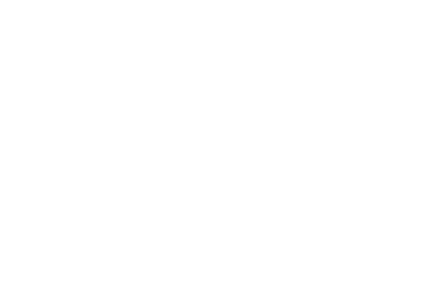

anonymizedQuery         SELECT%28++REGEX+%28++%22tt2321566%22%2C+%22st...
timestamp                                             2017-08-27 18:28:50
sourceCategory                                                    robotic
user_agent                                                        UNKNOWN
var_cpt                                                                 1
filter                                                                  0
orderby                                                                 0
select                                                                  1
distinct                                                                0
join                                                                    0
project                                                                 1
tomultiset                                                              0
union                                                                   0
modify                                

In [ ]:
query = df_nona.sort_values(["treewidth"],  ascending=[True]).head(10).iloc[2]
print(encoded2raw(query["anonymizedQuery"]))
G = base64_to_object(query["graphDump"])
pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos,
    labels={node: node for node in G.nodes()},
)
#nx.draw_networkx_edge_labels(
#    G, pos,
#    edge_labels=triples,
#    font_color='red',
#    font_size = 8
#)
plt.axis('off')
plt.show()

print(query)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=513ed372-d958-4618-b5dc-4b186f2555bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>